In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cmcrameri import cm

from utils import rcparams, to_GeV_per_cubic_femtometre, to_nucleons_per_cubic_femtometre
plt.rcParams.update(rcparams)

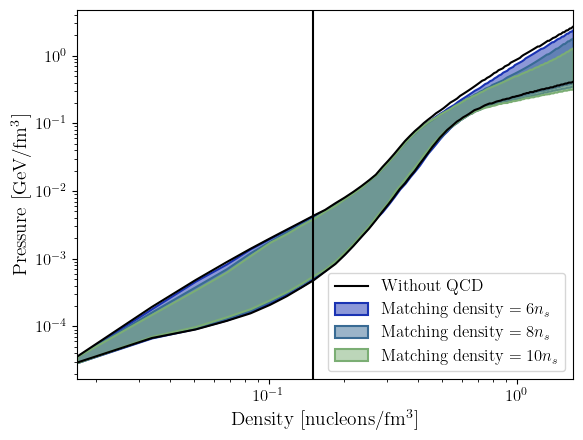

In [2]:
x = to_nucleons_per_cubic_femtometre(np.linspace(2.8e13, 2.8e15, 100))

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

quantiles = to_GeV_per_cubic_femtometre(
    pd.read_csv(f'quantiles/p_of_rho_quantiles.csv')
)

ax.plot(x, quantiles.loc[5,:].values, color='k', label='Without QCD')
ax.plot(x, quantiles.loc[95,:].values, color='k')

ns_list = [6,8,10]
linestyles = ['-', '-', '-']

for i, ns in enumerate(ns_list):

    quantiles = to_GeV_per_cubic_femtometre(
        pd.read_csv(f'quantiles/p_of_rho_quantiles_ns{ns:02}_Xmarg.csv')
    )

    ax.fill_between(
        x, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=list(cm.imola(i/(len(ns_list))))[:3]+[0.5], 
        edgecolor=cm.imola(i/(len(ns_list))),
        linewidth=1.5,
        linestyle=linestyles[i],
        label=f'Matching density $={ns}n_s$'
        )
    
    # ax.fill_between(
    #     x, 
    #     quantiles.loc[5,:].values, 
    #     quantiles.loc[95,:].values, 
    #     color=list(cm.imola(i/(len(ns_list))))[:3]+[0.0], 
    #     edgecolor=cm.imola(i/(len(ns_list))),
    #     linewidth=1.5,
    #     zorder=2
    #     )

ax.axvline(0.15, c='k')

ax.legend(loc='lower right')

# ax.set_ylim(1e-3, 1)
ax.set_xlim(x[0], x[-1])

ax.set_xlabel('Density [nucleons/fm$^3$]')
ax.set_ylabel('Pressure [GeV/fm$^3$]')

fig.savefig('figures/pressure_vs_density_Xmarg.pdf', bbox_inches='tight')

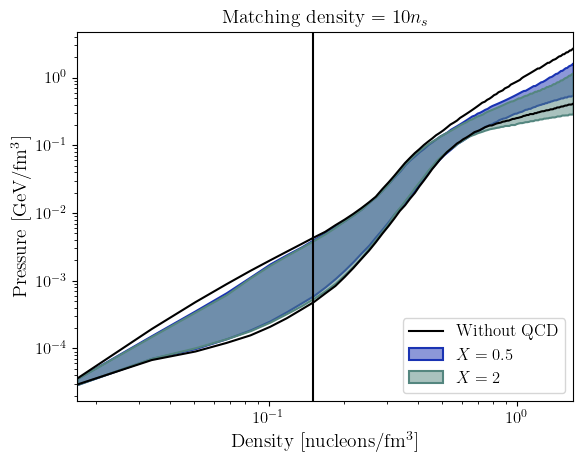

In [3]:
x = to_nucleons_per_cubic_femtometre(np.linspace(2.8e13, 2.8e15, 100))

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

quantiles = to_GeV_per_cubic_femtometre(
    pd.read_csv(f'quantiles/p_of_rho_quantiles.csv')
)

ax.plot(x, quantiles.loc[5,:].values, color='k', label='Without QCD')
ax.plot(x, quantiles.loc[95,:].values, color='k')

ns = 10
X_list = [0.5, 2]

for i, X in enumerate(X_list):

    quantiles = to_GeV_per_cubic_femtometre(
        pd.read_csv(f'quantiles/p_of_rho_quantiles_ns{ns:02}_X{X}.csv')
    )

    ax.fill_between(
        x, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=list(cm.imola(i/(len(X_list))))[:3]+[0.5], 
        edgecolor=cm.imola(i/(len(X_list))),
        linewidth=1.5,
        linestyle=linestyles[i],
        label=f'$X={X}$'
        )

ax.axvline(0.15, c='k')

ax.legend(loc='lower right')

# ax.set_ylim(1e-3, 1)
ax.set_xlim(x[0], x[-1])

ax.set_title(f'Matching density $={ns:02}n_s$')
ax.set_xlabel('Density [nucleons/fm$^3$]')
ax.set_ylabel('Pressure [GeV/fm$^3$]')

fig.savefig(f'figures/pressure_vs_density_ns{ns:02}_Xcomparison.pdf', bbox_inches='tight')

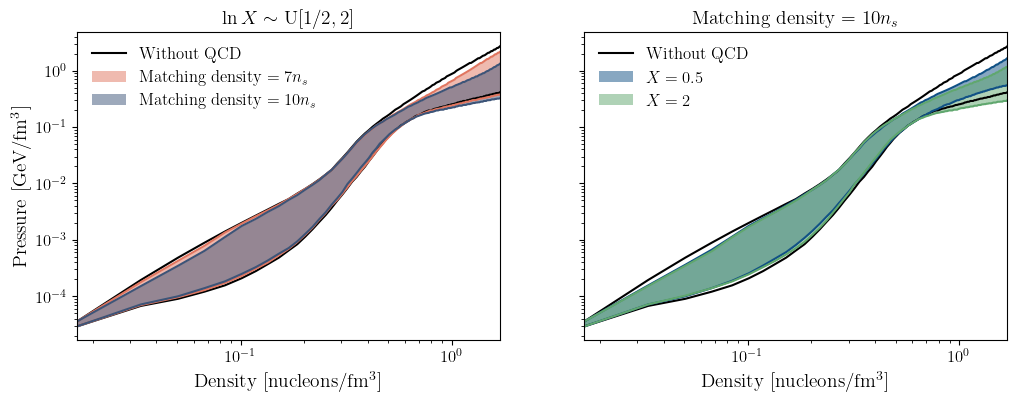

In [7]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 4))
axs[0].set_xscale('log')
axs[0].set_yscale('log')

x = to_nucleons_per_cubic_femtometre(np.linspace(2.8e13, 2.8e15, 100))

quantiles = to_GeV_per_cubic_femtometre(
    pd.read_csv(f'quantiles/p_of_rho_quantiles.csv')
)

for ax in axs:
    ax.plot(x, quantiles.loc[5,:].values, color='k', label='Without QCD')
    ax.plot(x, quantiles.loc[95,:].values, color='k')

axs[0].set_title('$\ln{X} \sim \mathrm{U}[1/2,2]$')

ns_list = [7,10]
c_list = [cm.lipari(0.65), cm.lipari(0.2)]

for i, ns in enumerate(ns_list):

    quantiles = to_GeV_per_cubic_femtometre(
        pd.read_csv(f'quantiles/p_of_rho_quantiles_ns{ns:02}_Xmarg.csv')
    )

    axs[0].fill_between(
        x, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=c_list[i], 
        alpha=0.5,
        linewidth=0,
        label=f'Matching density $={ns}n_s$'
        )
    
    axs[0].plot(
        x, 
        quantiles.loc[5,:].values,
        color=c_list[i],
        zorder=2
        )
    
    axs[0].plot(
        x, 
        quantiles.loc[95,:].values,
        color=c_list[i],
        zorder=2
        )


ns = 10
axs[1].set_title(f'Matching density $={ns:02}n_s$')

X_list = [0.5, 2]
c_list = [cm.navia(0.2), cm.navia(0.65)]

for i, X in enumerate(X_list):

    quantiles = to_GeV_per_cubic_femtometre(
        pd.read_csv(f'quantiles/p_of_rho_quantiles_ns{ns:02}_X{X}.csv')
    )

    axs[1].fill_between(
        x, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=c_list[i], 
        alpha=0.5,
        linewidth=0,
        label=f'$X={X}$'
        )
    
    axs[1].plot(
        x, 
        quantiles.loc[5,:].values,
        color=c_list[i],
        zorder=2
        )
    
    axs[1].plot(
        x, 
        quantiles.loc[95,:].values,
        color=c_list[i],
        zorder=2
        )

axs[0].legend(loc='upper left', frameon=False)
axs[1].legend(loc='upper left', frameon=False)

axs[0].set_xlim(x[0], x[-1])

axs[0].set_xlabel('Density [nucleons/fm$^3$]')
axs[1].set_xlabel('Density [nucleons/fm$^3$]')
axs[0].set_ylabel('Pressure [GeV/fm$^3$]')

fig.savefig('figures/pressure_vs_density.pdf', bbox_inches='tight')
